# Execute the code below

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)
df_zoom = df_music.loc[df_music.genre.isin(['Country', 'Classical']), ['genre', 'duration_ms', 'speechiness']].reset_index(drop = True)
df_zoom

# Standardization and classification

You now have a dataset with Country and Classical musics, and 2 numerical features : duration and speechiness.
Our goal will be to predict genre from numerical features.

## Draw a scatterplot from df_zoom with
- 'duration_ms' on X axis 
- 'speechiness' on Y axis
- 'genre' in hue

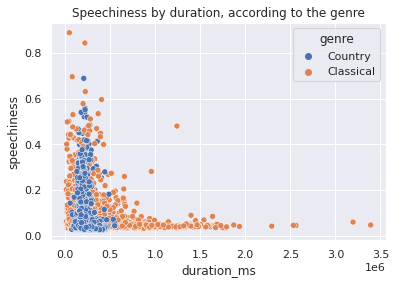

In [ ]:
# Your code here :
plt.figure()
sns.set_theme()
sns.scatterplot(data =df_zoom, x = 'duration_ms', y= 'speechiness' , hue = 'genre' )
plt.title('Speechiness by duration, according to the genre')
plt.show()

## Classification
From df_zoom : 
- define X (`duration_ms` and `speechiness`) 
- define y (`genre`)
- split your datas into train and test datasets, and `random_state = 2`
- perform 3 classification algorithms (Logistic Regression, KNN and Decision Tree)
- score your 3 models with accuracy score on the train dataset and on the test dataset


In [ ]:
# Your code here :
X = df_zoom[['duration_ms', 'speechiness']]
y = df_zoom['genre']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, train_size = 0.75)


In [ ]:
# Logistic regression 
modelLR = LogisticRegression().fit(X_train,y_train)
print('Accuracy score on the train set :', modelLR.score(X_train, y_train))
print('Accuracy score on the test set :', modelLR.score(X_test, y_test)) 

Accuracy score on the train set : 0.51875
Accuracy score on the test set : 0.5098214285714285


In [ ]:
# KNN
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)
print("Score for the Train dataset :", modelKNN.score(X_train, y_train))
print("Score for the Test dataset :", modelKNN.score(X_test, y_test))

Score for the Train dataset : 0.7979910714285714
Score for the Test dataset : 0.7129464285714285


In [ ]:
# Decision Tree
modelDT = DecisionTreeClassifier().fit(X_train, y_train)
print("Score for the Train dataset :", modelDT.score(X_train, y_train))
print("Score for the Test dataset :", modelDT.score(X_test, y_test))

Score for the Train dataset : 0.9997767857142857
Score for the Test dataset : 0.7381696428571428



You have to find these accuracy scores for test set :
- Logistic regression : 0.50982
- KNN : 0.71295
- Decision tree : 0.73728

It seems Decision tree is better, but did you look at the overfitting ?

## Standardization

- Fit your scaler model on X_train
- Transform X_train and X_test  with your scaler model into  X_train_scaled and X_test_scaled
- perform and score the same 3 classification algorithms, but with X_train_scaled and X_test_scaled

In [ ]:
# Your code here :

# fit the scaler model on X_train
scaler = StandardScaler().fit(X_train)

# transform the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# score from the 3 classification algorithms
modelLR = LogisticRegression().fit(X_train_scaled,y_train)
print('Logistic regression : Accuracy score on the train set :', modelLR.score(X_train_scaled, y_train))
print('Logistic regression : Accuracy score on the test set :', modelLR.score(X_test_scaled, y_test), '\n') 

modelKNN = KNeighborsClassifier().fit(X_train_scaled, y_train)
print("KNN : Score for the Train dataset :", modelKNN.score(X_train_scaled, y_train))
print("KNN : Score for the Test dataset :", modelKNN.score(X_test_scaled, y_test), '\n')

modelDT = DecisionTreeClassifier().fit(X_train_scaled, y_train)
print("Decision Tree: Score for the Train dataset :", modelDT.score(X_train_scaled, y_train))
print("Decision Tree: Score for the Test dataset :", modelDT.score(X_test_scaled, y_test))

Logistic regression : Accuracy score on the train set : 0.6578125
Logistic regression : Accuracy score on the test set : 0.6667410714285714 

KNN : Score for the Train dataset : 0.8364583333333333
KNN : Score for the Test dataset : 0.7743303571428571 

Decision Tree: Score for the Train dataset : 0.9997767857142857
Decision Tree: Score for the Test dataset : 0.7377232142857143


# Conclusion
- Decision tree is insensitive to Standardization.
- Logistic regression and KNN have better result after Standardization.


We can remember that standardization is always good in preprocessing, before machine learning classifications and regressions. At worst, it does not change anything. At best, it improves results.